<a href="https://colab.research.google.com/github/arssite/openVision/blob/main/BusMotorcycleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intalling Necessary Libaries

In [ ]:
pip install tensorflow fastdup opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pillow-heif to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 9.7 MB/s 

#Importing Libaries and Dataset from Drive

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = '/content/drive/MyDrive/Ronit/dataset/vehicle_dataset/val'

#Define Generators and Loading Training-validation Datasets

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Rescale pixel values from [0, 255] to [0, 1]
    shear_range=0.2,               # Random shear in degrees
    zoom_range=0.2,                # Random zoom
    horizontal_flip=True,          # Randomly flip images
    validation_split=0.2)          # Use 20% of training data for validation

#Load the training & validation data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),        # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',      # Use categorical labels
    subset='training')             # Set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')           # Set as validation data


Found 64 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


#Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


#FastDup

In [ ]:
import fastdup
fd = fastdup.create(work_dir="drive/MyDrive/Ronit/fastdup_analysis", input_dir="drive/MyDrive/Ronit/dataset/vehicle_dataset/val")
fd.run()

Fastdup was already applied, use overwrite=True to re-run



fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "drive/MyDrive/Ronit/dataset/vehicle_dataset/val"
Work directory is set to "drive/MyDrive/Ronit/fastdup_analysis"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



In [ ]:
fd.run()

Fastdup was already applied, use overwrite=True to re-run


In [ ]:
duplicates = fd.find_duplicates()
anomalies = fd.find_anomalies()
for dup in duplicates:
    os.remove(dup)
for anomaly in anomalies:
    os.remove(anomaly)

In [ ]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 71 images
    Valid images are 100.00% (71) of the data, invalid are 0.00% (0) of the data
    Outliers: 8.45% (6) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 71 images',
 'Valid images are 100.00% (71) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 8.45% (6) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

Generating gallery:   0%|          | 0/4 [00:00<?, ?it/s]

Stored similarity visual view in  drive/MyDrive/Ronit/fastdup_analysis/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



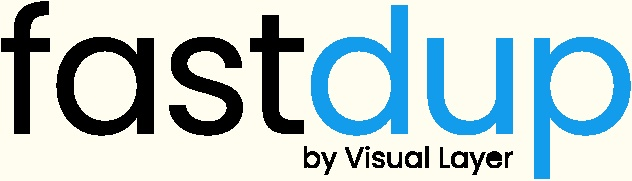
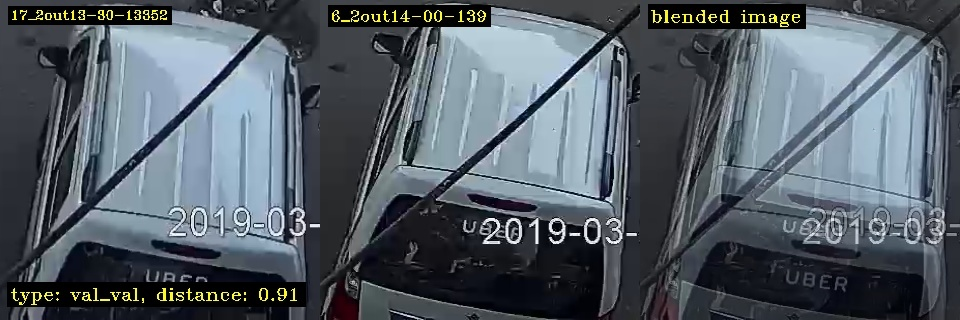
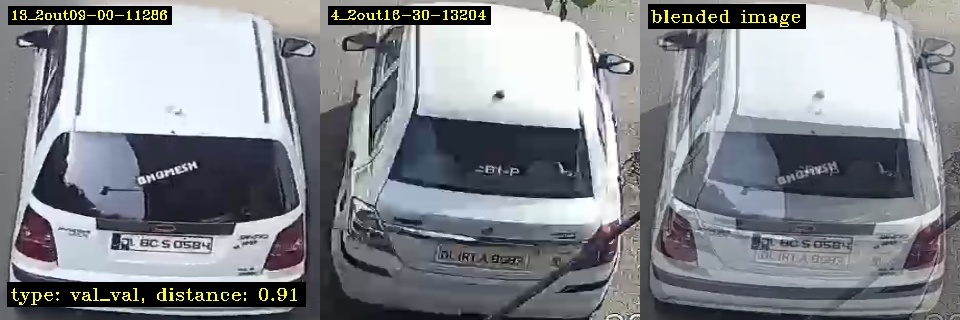

0

In [ ]:
fd.vis.duplicates_gallery()

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored mean visual view in  drive/MyDrive/Ronit/fastdup_analysis/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



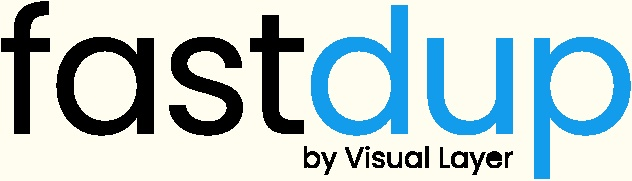
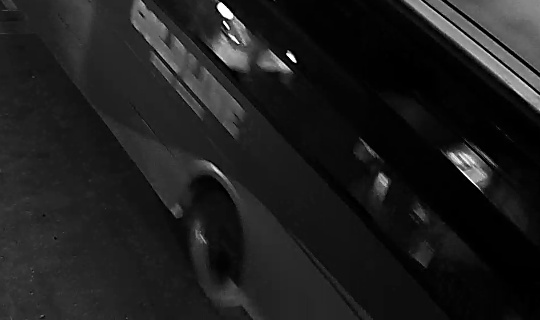
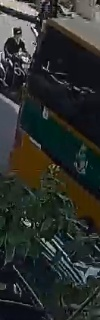
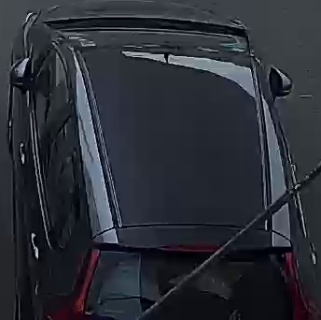
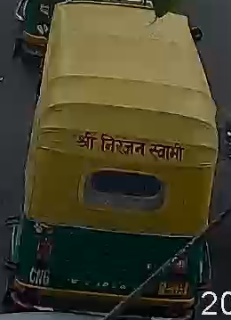
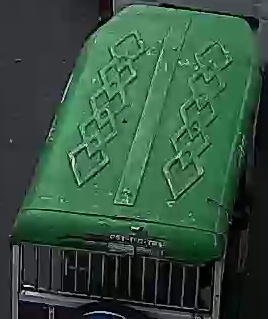
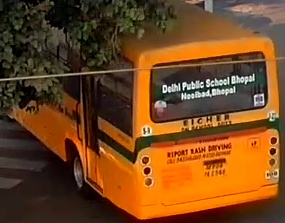
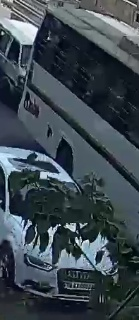
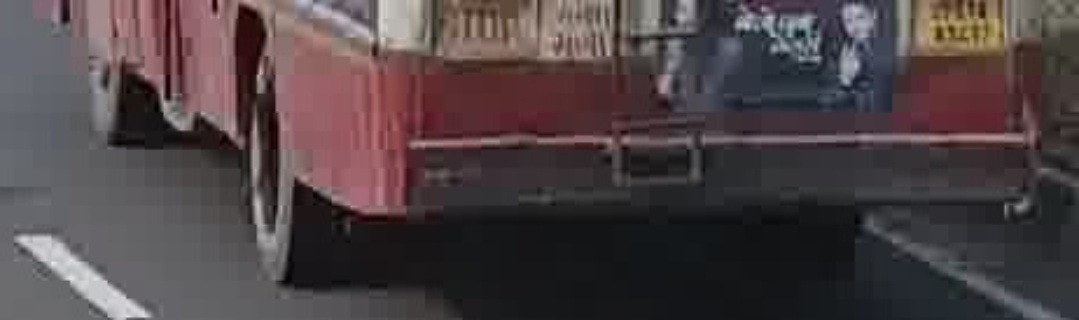
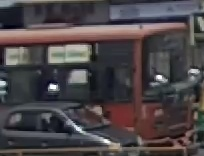
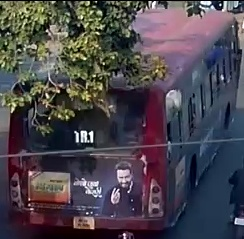
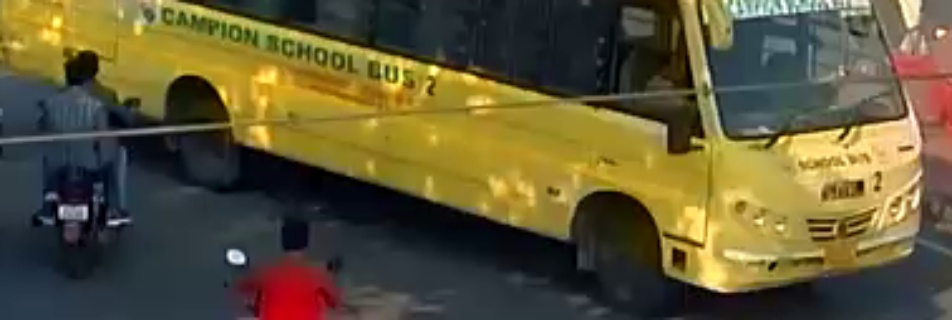
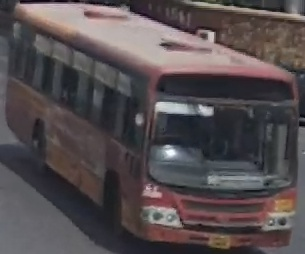
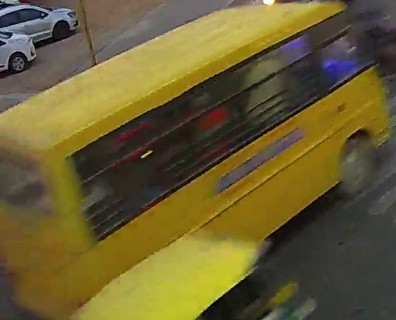
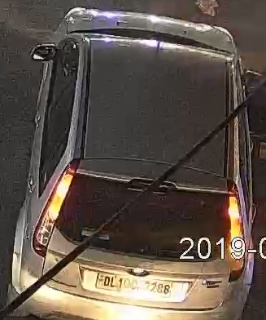
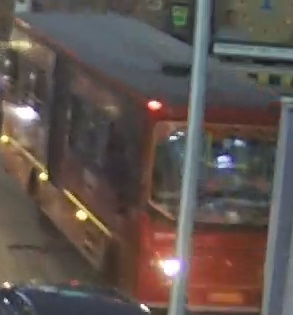
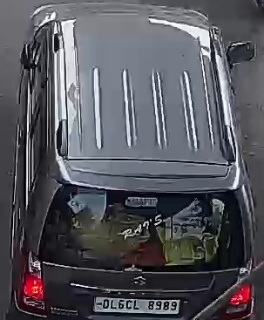
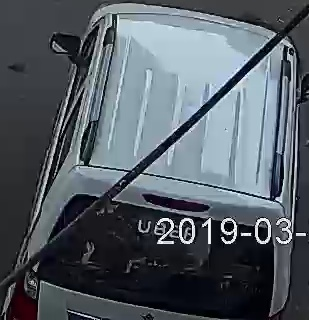
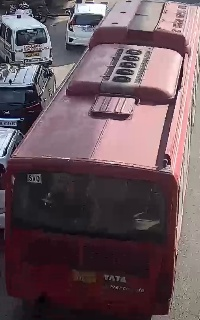
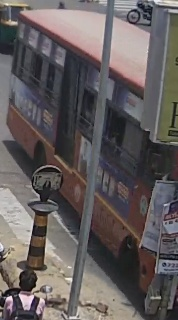
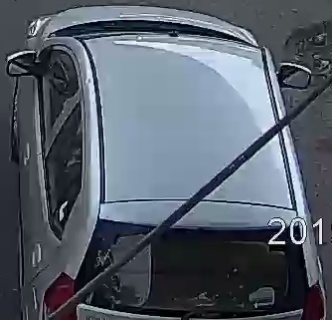

0

In [ ]:
fd.vis.stats_gallery()

Generating gallery:   0%|          | 0/4 [00:00<?, ?it/s]

Stored similar images visual view in  drive/MyDrive/Ronit/fastdup_analysis/galleries/similarity.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



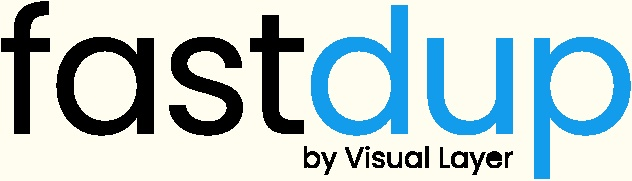
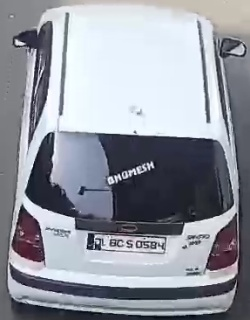
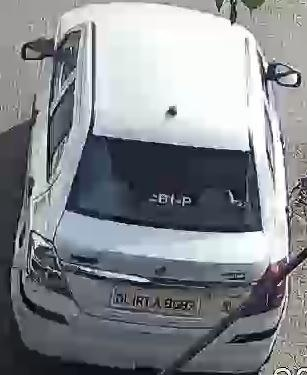
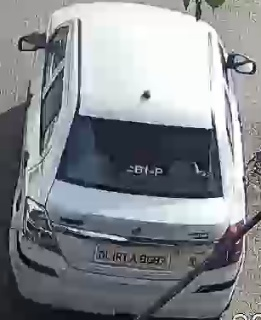
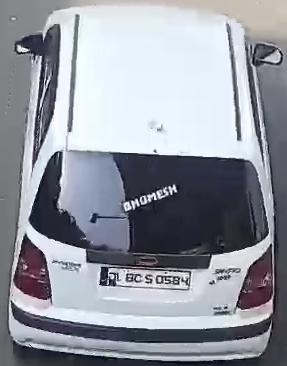
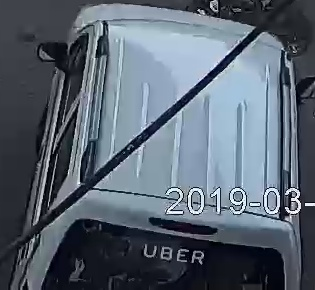
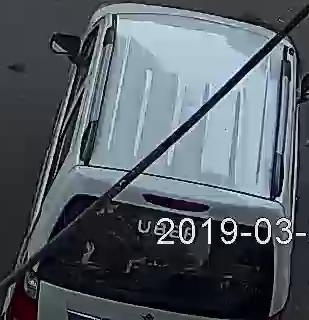
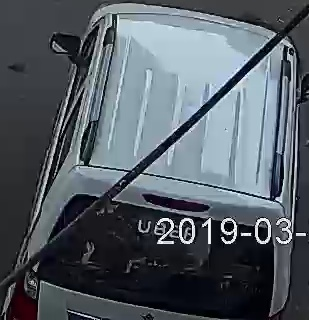
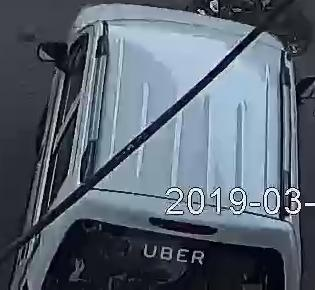

,from,to,distance
0,drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/13_2out09-00-11286.png,[drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/4_2out16-30-13204.png],[0.909541]
2,drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/4_2out16-30-13204.png,[drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/13_2out09-00-11286.png],[0.909541]
1,drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/17_2out13-30-13352.png,[drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/6_2out14-00-139.png],[0.912908]
3,drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/6_2out14-00-139.png,[drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/17_2out13-30-13352.png],[0.912908]


In [ ]:
fd.vis.similarity_gallery()

In [ ]:
# Reload the cleaned training and validation datasets
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 64 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


#Now working on Cleaned Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming cleaned data is in the same directory
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Rescale pixel values from [0, 255] to [0, 1]
    shear_range=0.2,               # Random shear in degrees
    zoom_range=0.2,                # Random zoom
    horizontal_flip=True,          # Randomly flip images
    validation_split=0.2)          # Use 20% of training data for validation

# Load the cleaned training and validation datasets
train_generator = train_datagen.flow_from_directory(
    data_dir,                      # or use `cleaned_data_dir` if images were moved
    target_size=(224, 224),        # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',      # Use categorical labels
    subset='training')             # Set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir,                      # or use `cleaned_data_dir`
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')           # Set as validation data



Found 64 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 1.8689 - accuracy: 0.4688 - val_loss: 1.4351 - val_accuracy: 0.9333
Epoch 2/10
2/2 [==============================] - 2s 958ms/step - loss: 1.8460 - accuracy: 0.8906 - val_loss: 1.4814 - val_accuracy: 0.9333
Epoch 3/10
2/2 [==============================] - 2s 955ms/step - loss: 1.5136 - accuracy: 0.8906 - val_loss: 1.2639 - val_accuracy: 0.9333
Epoch 4/10
2/2 [==============================] - 2s 993ms/step - loss: 0.8501 - accuracy: 0.8906 - val_loss: 0.9357 - val_accuracy: 0.9333
Epoch 5/10
2/2 [==============================] - 2s 1s/step - loss: 0.3186 - accuracy: 0.9062 - val_loss: 0.5484 - val_accuracy: 0.9333
Epoch 6/10
2/2 [==============================] - 2s 971ms/step - loss: 0.0444 - accuracy: 0.9688 - val_loss: 0.3626 - val_accuracy: 0.9333
Epoch 7/10
2/2 [==============================] - 2s 934ms/step - loss: 0.0405 - accuracy: 0.9844 - val_loss: 0.2068 - val_accuracy: 0.8667
Epoch 8/10
2/2 [==========

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

1/1 [==============================] - 0s 388ms/step - loss: 0.1871 - accuracy: 0.9333
Validation Loss: 0.18714573979377747
Validation Accuracy: 0.9333333373069763
1/1 [==============================] - 1s 1s/step
[[14  0]
 [ 1  0]]
              precision    recall  f1-score   support

         bus       0.93      1.00      0.97        14
  motorcycle       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("vehicle_model")

Extracting metadata:   0%|          | 0/3 [26:39<?, ?it/s]


#ONNX

In [ ]:
pip install tf2onnx

In [ ]:
!python -m tf2onnx.convert --saved-model vehicle_model --output vehicle_model.onnx

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2024-08-10 14:42:14,382 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2024-08-10 14:42:18,729 - INFO - Signatures found in model: [serving_default].
2024-08-10 14:42:18,729 - WARNING - '--signature_def' not specified, using first signature: serving_default
2024-08-10 14:42:18,729 - INFO - Output names: ['dense_1']
2024-08-10 14:42:20,412 - INFO - Using tensorflow=2.15.0, onnx=1.16.2, tf2onnx=1.16.1/15c810
2024-08-10 14:42:20,412 - INFO - Using opset <onnx, 15>
2024-08-10 14:42:20,587 - INFO - Computed 0 values for constant folding
2024-08-10 14:42:20,971 - INFO - Optimizing ONNX model
2024-08-10 14:42:22,404 - INFO - After optimization: BatchNormalization -52 (52->0), Const -248 (360->112), GlobalAveragePool +1 (0->1), Identity

In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

onnx_session = ort.InferenceSession("vehicle_model.onnx")

img_path = '/content/drive/MyDrive/Ronit/dataset/vehicle_dataset/val/bus/0_14389_16-40-13_002513.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


inputs = {onnx_session.get_inputs()[0].name: img_array}
predictions = onnx_session.run(None, inputs)
print(predictions)

[array([[9.9998689e-01, 1.3132005e-05]], dtype=float32)]


#Different Model Architectures, Hyperparameters, and Training Strategies

##Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(scheduler)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 0.5515 - accuracy: 0.5781 - val_loss: 0.6753 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 1.2052 - accuracy: 0.8906 - val_loss: 0.8159 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 1.3177 - accuracy: 0.8906 - val_loss: 0.7258 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 1.1057 - accuracy: 0.8906 - val_loss: 0.5285 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.7957 - accuracy: 0.8906 - val_loss: 0.2777 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.3656 - accuracy: 0.8906 - val_loss: 0.6416 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.6710 - accuracy: 0.5781 - val

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

1/1 [==============================] - 1s 1s/step


In [ ]:
print(confusion_matrix(y_true, y_pred))

[[14  0]
 [ 1  0]]


In [ ]:
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

              precision    recall  f1-score   support

         bus       0.93      1.00      0.97        14
  motorcycle       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

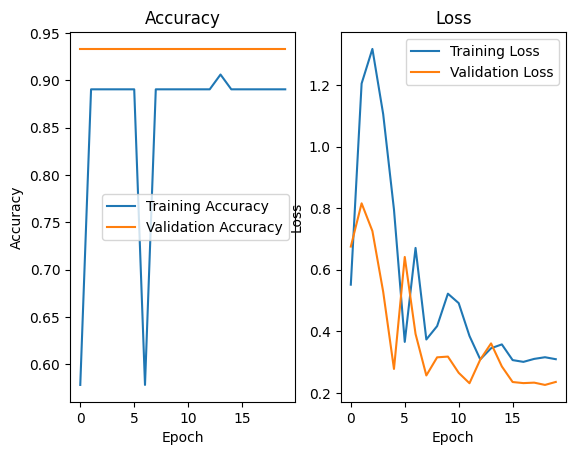

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("vehicle_model")

In [ ]:
!python -m tf2onnx.convert --saved-model vehicle_model --output vehicle_model2.onnx

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2024-08-10 14:57:11,486 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2024-08-10 14:57:16,494 - INFO - Signatures found in model: [serving_default].
2024-08-10 14:57:16,494 - WARNING - '--signature_def' not specified, using first signature: serving_default
2024-08-10 14:57:16,495 - INFO - Output names: ['dense_3']
2024-08-10 14:57:22,818 - INFO - Using tensorflow=2.15.0, onnx=1.16.2, tf2onnx=1.16.1/15c810
2024-08-10 14:57:22,818 - INFO - Using opset <onnx, 15>
2024-08-10 14:57:23,435 - INFO - Computed 0 values for constant folding
2024-08-10 14:57:24,488 - INFO - Optimizing ONNX model
2024-08-10 14:57:25,701 - INFO - After optimization: Add -1 (19->18), BatchNormalization -53 (53->0), Const -161 (273->112), GlobalAveragePool +1

#Testing

In [ ]:
import onnxruntime as ort
import numpy as np
onnx_session = ort.InferenceSession('vehicle_model.onnx')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

In [ ]:
img_path = '/content/bus.jpg'
preprocessed_img = preprocess_image(img_path)
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class index: {predicted_class}')

1/1 [==============================] - 0s 87ms/step
Predicted class index: [0]


In [ ]:
img_path = '/content/drive/MyDrive/Ronit/dataset/vehicle_dataset/val/motorcycle/12_2out13-00-1364.png'
preprocessed_img = preprocess_image(img_path)
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class index: {predicted_class}')

1/1 [==============================] - 0s 85ms/step
Predicted class index: [0]
